In [11]:
!pip install pickle5

     ------------------------------------ 124.7/124.7 kB 386.6 kB/s eta 0:00:00


In [17]:
import random
import torch
import numpy as np
import pickle5 as pickle
from datasets.voice_faces_dataset import VoiceFacesDataset
import matplotlib.pyplot as plt
torch.cuda.is_available()

True

In [7]:
random.seed(100)
torch.manual_seed(100)
torch.cuda.manual_seed(100)
np.random.seed(100)

In [8]:
# Load embeddings
audio_embeddings = pickle.load(open('data/audio_embeddings.pickle', 'rb'))
image_embeddings = pickle.load(open('data/image_embeddings.pickle', 'rb'))

# Create the train and validation datasets of triplets
voice_faces_dataset = VoiceFacesDataset(audio_embeddings, image_embeddings)

In [12]:
voice_faces_dataset.persons_list[:10]

[Amitabh_Bachchan,
 Benjamin_Castaldi,
 Ashley_Scott,
 Ewan_McGregor,
 Sean_Patrick_Flanery,
 August_Diehl,
 Guy_Pearce,
 Bradley_James,
 Reggie_Lee,
 Nobu_Matsuhisa]

In [10]:
len(voice_faces_dataset.persons_list)

2979

## Checking the L-2 norms of the embeddings

In [29]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [30]:
image_l2_norms = [[np.linalg.norm(embedding) for embedding in person._image_embeddings] for person in voice_faces_dataset.persons_list]
image_l2_norms = flatten_list(image_l2_norms)
image_l2_norms

[0.99999994,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 1.0000001,
 1.0,
 1.0,
 1.0,
 0.9999999,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 1.0,
 0.9999999,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 0.9999999,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0000001,
 0.99999994,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0000001,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 1.0,

In [39]:
unique_values,counts = np.unique(image_l2_norms,return_counts=True)

In [40]:
for unique_value, count in zip(unique_values,counts):
    print(f"Unique image L-2 norm value: {unique_value}, Count: {count}")

Unique image L-2 norm value: 0.9999998807907104, Count: 72
Unique image L-2 norm value: 0.9999999403953552, Count: 1987
Unique image L-2 norm value: 1.0, Count: 4533
Unique image L-2 norm value: 1.0000001192092896, Count: 60


In [41]:
audio_l2_norms = [[np.linalg.norm(embedding) for embedding in person._audio_embeddings] for person in voice_faces_dataset.persons_list]
audio_l2_norms = flatten_list(audio_l2_norms)
audio_l2_norms

[266.55978,
 283.24655,
 280.79178,
 313.4137,
 257.57703,
 267.94473,
 250.13701,
 303.9415,
 298.46143,
 278.50958,
 260.82663,
 267.29916,
 262.74295,
 275.12543,
 288.19388,
 248.23247,
 259.79233,
 259.54065,
 229.48027,
 249.66443,
 284.80734,
 261.79205,
 285.2578,
 251.24727,
 275.09818,
 304.58392,
 249.34338,
 269.7222,
 287.16415,
 245.40419,
 244.10126,
 264.78177,
 270.56857,
 241.7501,
 258.7919,
 262.6322,
 221.65027,
 267.40317,
 228.25809,
 271.47302,
 250.80101,
 303.8993,
 298.27402,
 297.3984,
 300.68637,
 251.74457,
 292.38593,
 276.1083,
 279.4922,
 295.66998,
 262.0754,
 250.09514,
 262.67334,
 242.63005,
 283.35675,
 258.36157,
 245.91411,
 275.298,
 257.54706,
 274.078,
 279.9442,
 272.9512,
 266.40524,
 266.70416,
 289.22864,
 275.59488,
 300.90366,
 306.7992,
 281.6299,
 271.12357,
 306.30222,
 307.39,
 258.97125,
 291.79974,
 309.6315,
 307.8705,
 302.31232,
 307.53702,
 296.43832,
 305.49283,
 268.7639,
 317.14645,
 321.9769,
 273.1899,
 279.42142,
 261.372

Text(0, 0.5, 'Count')

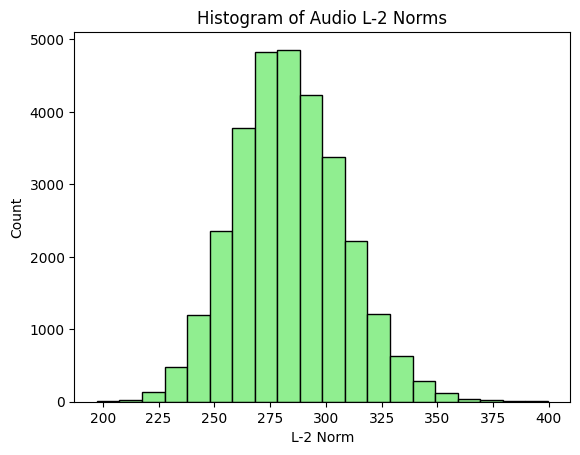

In [43]:
plt.hist(audio_l2_norms, color='lightgreen', ec='black',bins=20)
plt.title('Histogram of Audio L-2 Norms')
plt.xlabel('L-2 Norm')
plt.ylabel('Count')

## Making sure the input audios are 10

In [48]:
audios_per_person = [person._audio_embeddings_n for person in voice_faces_dataset.persons_list]
[audio_per_person for audio_per_person in audios_per_person if audio_per_person!=10]

[]

In [49]:
images_per_person = [person._image_embeddings_n for person in voice_faces_dataset.persons_list]
images_per_person

[3,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 4,
 1,
 6,
 9,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 3,
 3,
 5,
 2,
 1,
 3,
 3,
 1,
 7,
 2,
 6,
 7,
 3,
 1,
 1,
 1,
 2,
 4,
 4,
 1,
 1,
 2,
 3,
 1,
 2,
 2,
 4,
 2,
 4,
 6,
 2,
 5,
 1,
 5,
 1,
 3,
 1,
 4,
 2,
 1,
 2,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 4,
 1,
 3,
 1,
 2,
 1,
 1,
 6,
 4,
 1,
 2,
 1,
 1,
 3,
 6,
 1,
 2,
 5,
 1,
 2,
 3,
 1,
 8,
 2,
 1,
 6,
 1,
 1,
 1,
 8,
 2,
 4,
 1,
 3,
 2,
 2,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 5,
 3,
 1,
 2,
 1,
 2,
 1,
 4,
 1,
 7,
 6,
 2,
 1,
 4,
 2,
 4,
 5,
 1,
 1,
 1,
 4,
 3,
 1,
 1,
 3,
 14,
 1,
 1,
 1,
 1,
 1,
 10,
 2,
 2,
 2,
 4,
 4,
 1,
 1,
 2,
 2,
 2,
 1,
 5,
 2,
 1,
 2,
 2,
 4,
 1,
 4,
 7,
 2,
 2,
 1,
 2,
 1,
 4,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 4,
 2,
 1,
 1,
 2,
 2,
 1,
 6,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 6,
 2,
 1,
 2,
 2,
 3,
 1,
 4,
 1,
 2,
 1,
 1,
 4,
 3,
 2,
 2,
 1,
 1

Text(0, 0.5, 'Count')

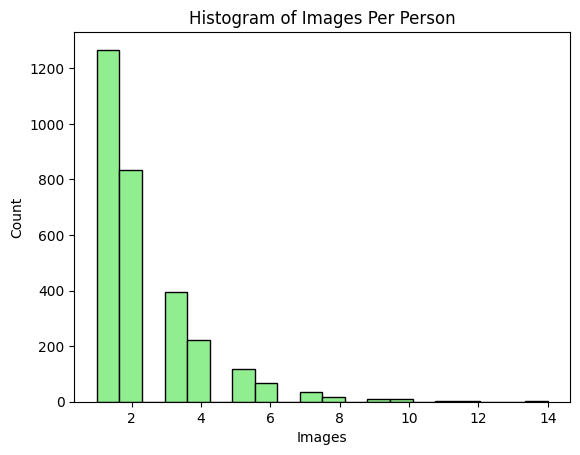

In [51]:
plt.hist(images_per_person, color='lightgreen', ec='black',bins=20)
plt.title('Histogram of Images Per Person')
plt.xlabel('Images')
plt.ylabel('Count')